<a href="https://colab.research.google.com/github/vasanth9/ccfdetect/blob/master/BackgroundAnalysis/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code




 ggplot in Python to create data visualizations using a grammar of graphics. ... It abstracts most low-level details, letting you focus on creating meaningful and beautiful visualizations for your data. There are several Python packages that provide a grammar of graphics.

In [3]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [9]:
#read data using pandas
df=pd.read_csv('creditcard.csv')

In [10]:
print("The dataframe has {} rows and {} columns".format(df.shape[0],df.shape[1]))

The dataframe has 284807 rows and 31 columns


In [11]:
#sample
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
262769,160638.0,2.063373,-0.050442,-1.485026,0.139775,0.267387,-0.768359,0.158730,-0.239662,0.342155,0.179307,0.609031,0.925918,0.245890,0.619757,0.055034,0.110158,-0.937059,0.563540,0.235745,-0.206241,0.267998,0.915149,-0.074199,-0.450312,0.307547,-0.099266,-0.022982,-0.073130,2.29,0
203706,134930.0,-0.008589,1.220770,-2.873759,-1.305186,4.137472,2.578745,1.055187,0.642930,-0.883297,-1.762332,0.602129,-0.730212,-0.702338,-2.284464,-0.004913,0.241560,2.040651,0.553613,-0.588596,-0.018685,-0.007571,-0.003090,-0.396343,0.525189,0.400464,0.707734,-0.000967,0.064128,0.76,0
116864,74456.0,0.690102,1.735269,-2.137024,1.349925,1.511262,-1.057337,0.896277,-0.179266,-0.640061,-0.939673,1.863832,0.322590,0.916650,-3.622355,0.337001,1.213999,2.207061,2.144450,0.186625,0.183883,-0.121104,-0.119060,-0.016587,-0.816448,-0.351482,-0.382855,0.125120,-0.006342,0.50,0
129593,79149.0,0.866556,-0.679682,1.116114,0.762595,-1.307337,-0.168765,-0.563638,0.153795,0.593954,-0.077508,1.197894,0.898792,-0.318551,-0.004922,-0.010127,0.503982,-0.472500,0.509114,-0.058665,0.184189,0.240199,0.477735,-0.161568,0.595466,0.207324,0.528875,-0.027364,0.039513,150.00,0
126296,77977.0,1.160073,-0.537258,0.876405,-0.879565,-1.074253,-0.057865,-0.837261,0.322873,1.745320,-0.918792,1.268296,0.856765,-1.381026,0.321968,0.959435,-0.479767,-0.047601,0.386690,0.496518,-0.225526,0.052592,0.339434,-0.004097,0.008062,0.355802,-0.670027,0.098230,0.019024,1.00,0


In [12]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [21]:
#leaving non anonymized attributes
pd.set_option('precision',3)
df.loc[:,['Time','Amount']].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


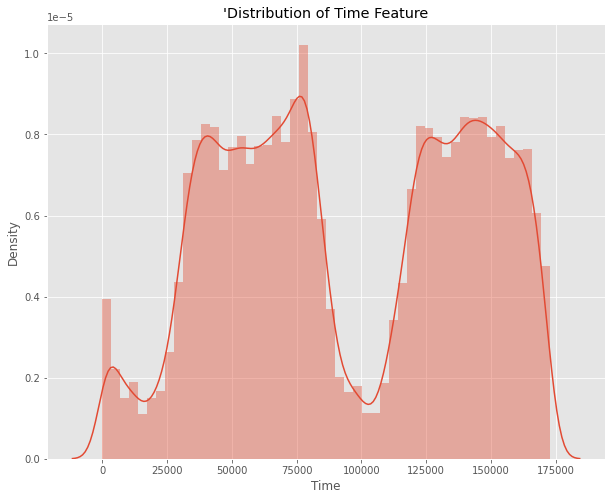

In [22]:
#visualizations of Time
plt.figure(figsize=(10,8))
plt.title("'Distribution of Time Feature")
sns.distplot(df.Time)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


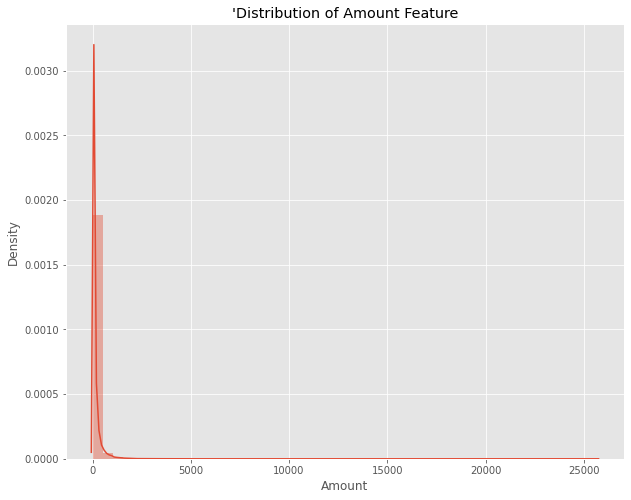

In [23]:
#visualizations of Amount
plt.figure(figsize=(10,8))
plt.title("'Distribution of Amount Feature")
sns.distplot(df.Amount)

In [24]:
#no. of fraud and non fraud data points
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

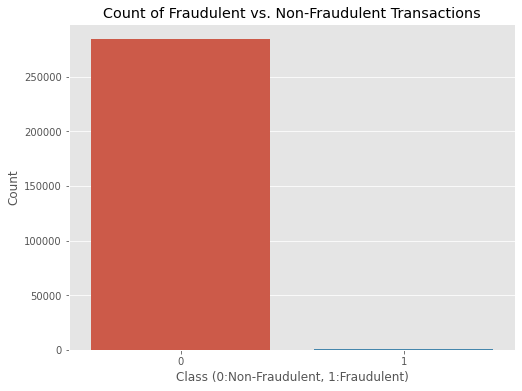

In [25]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')